# <h1><center>Traveler Guideline to Boston</center></h1>

### Goal of the Project:
- Help tourists to find out when should they visit Boston(save money)
    - which month and day of the week, the rental price is cheaper
- Help tourists to find out where should they living(live safer)
    - which area has a relatively low crime incidence

### Price Analysis of Airbnb Boston
- Average Price For each Month
- Average Price by week of the day
- Average Price 
    - by Region
    - Price range
    - living type

### Crime Analysis in Boston
- Crime count for everyday and hour
- Crime count by month
- Crime count by District
    - larceny Crime(theft)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Price Analysis of Airbnb Boston

- Data from http://insideairbnb.com/get-the-data.html

In [3]:
calendar_data=pd.read_csv('calendar.csv',sep=',')
calendar_data.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50032,2019-01-17,f,$538.00,$538.00,3,365
1,50032,2019-01-18,f,$550.00,$550.00,3,365
2,50032,2019-01-19,f,$562.00,$562.00,3,365


In [4]:
# Pick year, month, day of week from timestamp
split=pd.DataFrame()
split['year']=pd.to_datetime(calendar_data['date']).dt.year
split['month']=pd.to_datetime(calendar_data['date']).dt.month
split['dayofweek']=pd.to_datetime(calendar_data['date']).dt.dayofweek
split.head()
new_calendar=calendar_data.join(split,on=None,how='left',sort=False)

In [5]:
#remove $ sign in price
new_calendar['price']=new_calendar['price'].str.replace('$','')
new_calendar['price']=pd.to_numeric(new_calendar['price'],errors='coerce')

## Average Price for each month

In [6]:
price_month=new_calendar[['month','price']]
price_month_mean=price_month.groupby('month').mean()
price_month_mean.sort_values(by=['price'])

,price
month,
2,144.199416
1,170.054744
3,174.950008
12,183.893904
11,194.820216
4,201.881247
10,209.257562
9,210.299424
8,218.005787


In [43]:
mean_month = price_month_mean.sort_values(by=['price'])

In [45]:
mean_month.to_csv('Output 1_average price for each month.csv')

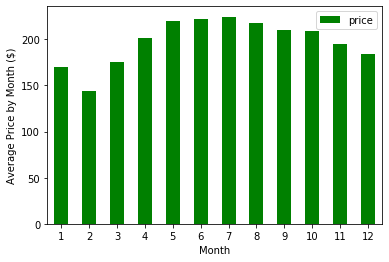

In [7]:
plot1=price_month_mean.plot(kind='bar',color='green',rot = 0)
plot1.set_xlabel('Month')
plot1.set_ylabel('Average Price by Month ($)')
plot1

### Average Price by week of the day

In [8]:
price_week=new_calendar[['dayofweek','price']]
price_week_mean = price_week.groupby('dayofweek').mean()
price_week_mean = price_week_mean.sort_values(by=['price'])
# rename index
price_week_mean = price_week_mean.rename(index = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',\
                                                  4:'Friday',5:'Saturday',6:'Sunday'})
price_week_mean                                                                                                

,price
dayofweek,
Monday,195.231844
Tuesday,195.251129
Wednesday,195.984444
Sunday,196.509408
Thursday,196.752763
Friday,203.227193
Saturday,204.051798


In [46]:
price_week_mean.to_csv('Output 2_Average Price by week of the day.csv')

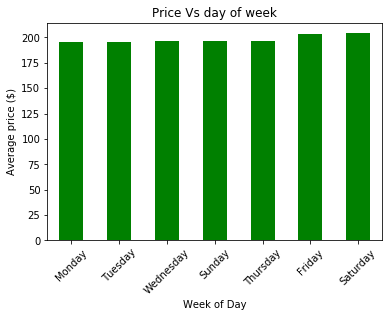

In [9]:
plot3=price_week_mean.plot(kind='bar',color='green', rot = 45, legend = None)
plot3.set_xlabel('Week of Day')
plot3.set_ylabel('Average price ($)')
plot3.set_title('Price Vs day of week')
plot3

## Average Price by Region

In [10]:
listings = pd.read_csv("listings.csv")

In [11]:
listings['price'].head(3)

0    $125.00
1    $145.00
2    $169.00
Name: price, dtype: object

In [12]:
# Statistical Analysis of Price
prices = listings['price'].map(lambda p: int(p[1:-3].replace(",", "")))
prices.describe()

count    6247.000000
mean      202.083400
std       371.325512
min         0.000000
25%        82.000000
50%       144.000000
75%       212.000000
max      5000.000000
Name: price, dtype: float64

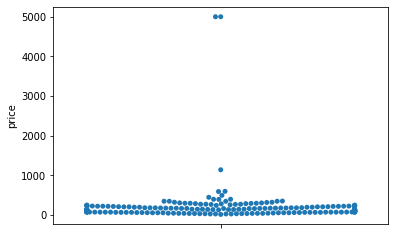

In [13]:
# random pick 250 data from price
# This chart shows that most price is under 400
sns.swarmplot(y=prices.sample(200))

In [14]:
listings['price'] = prices

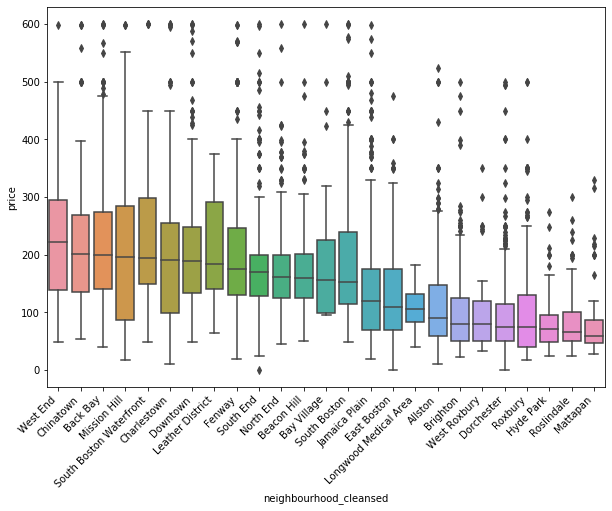

In [15]:
# Average Price by region
# Box plot
plt.figure(figsize=(10,7))
sort_order = listings.query('price <= 600')\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings.query('price <= 600'), 
            order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

## Average Price of Type of living

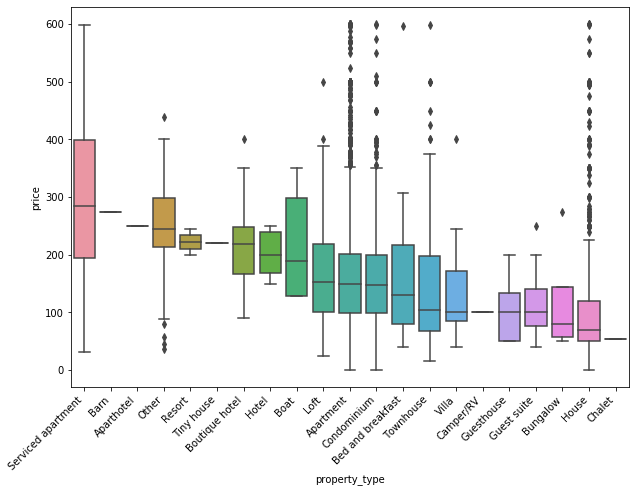

In [16]:
# Bar Plot for average price of different properties
plt.figure(figsize=(10,7))
sort_order = listings.query('price <= 600')\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=listings.query('price <= 600'), order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

- The average price for house is lower than the other type of property, most price for house is around 100 each day. But the range of price for house is large.
- For apartment, most price is around 200. The range of price for apartment is also very large.

# Crime Analysis in Boston

- https://www.kaggle.com/ankkur13/boston-crime-data

In [17]:
original=pd.read_csv('crime.csv',engine='python')

In [18]:
original.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [19]:
original['YEAR'].unique()

array([2018, 2017, 2016, 2015], dtype=int64)

In [20]:
original.shape

(327820, 17)

In [21]:
crime_df = original.drop(columns='SHOOTING')
crime_df = crime_df.dropna(axis=0)

### Crime count for each day of the week and each hour of the day

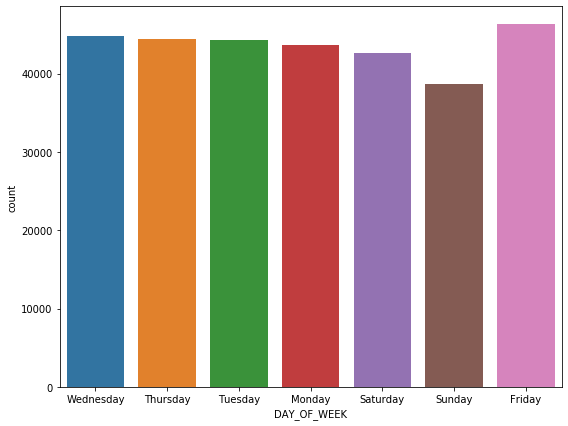

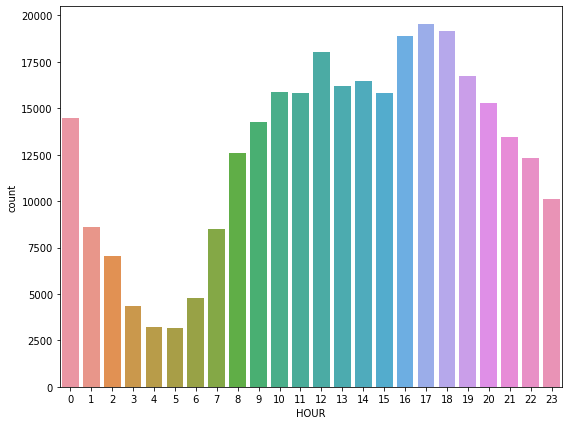

In [22]:
plt.figure(figsize=(9,7))    #We are giving the size of figure
sns.countplot(x=crime_df.DAY_OF_WEEK)  #countplot taking counts of the columns which you choose 
plt.show() 

plt.figure(figsize=(9,7))    
sns.countplot(x=crime_df.HOUR)  
plt.show() 

- Friday has more crime, it might be cause of last day of work for the most of people so people more aggresive in that day. And at 17:00 there is more crime compared to other hours of day it's olsa might be cause of work
- During the day, around 12:00 lunch hour and between 4 and 6 in the afternoon. There are more crime than the other time of the day.So people should avoid go out to high crime area during these time period.

### Crime count by month

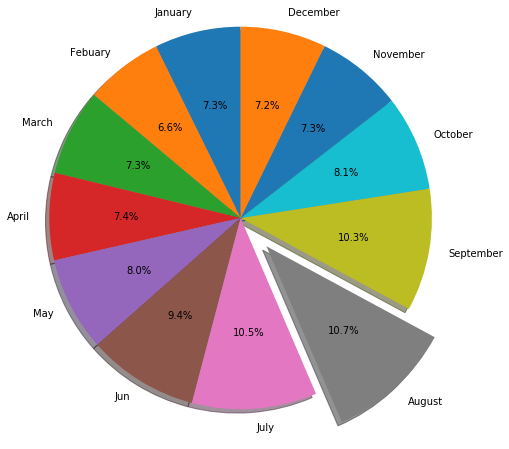

In [23]:
plt.figure(figsize=(8,8))    #The size of figure

#giving the name of piecies
labels = 'January', 'Febuary', 'March', 'April', 'May', 'Jun', 'July', 'August', 'September', 'October', 'November', 'December'
sizes_month = []    
for i in range(12):
    i+=1
    sizes_month.append(len(crime_df[crime_df['MONTH']==i]))#count of crime for every month
    
explode = (0, 0,0,0,0,0,0,0.2,0,0,0,0)  #choose one piece of pie it's going out from the middle
                               
plt.pie(sizes_month, explode = explode, labels=labels,  
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [24]:
#! pip install folium

In [25]:
original['OCCURRED_ON_DATE']=pd.to_datetime(original['OCCURRED_ON_DATE'])

In [26]:
original['OCCURRED_ON_DATE']

0        2018-10-03 20:13:00
1        2018-08-30 20:00:00
2        2018-10-03 19:20:00
3        2018-10-03 20:00:00
4        2018-10-03 20:49:00
                 ...        
327815   2016-06-05 17:25:00
327816   2015-07-09 13:38:00
327817   2015-07-09 13:38:00
327818   2016-05-31 19:35:00
327819   2015-06-22 00:12:00
Name: OCCURRED_ON_DATE, Length: 327820, dtype: datetime64[ns]

### Visualization-by DISTRICT

In [27]:
# Here I want to discover which region has lower crime rate

In [28]:
disgroup=original.groupby(by='DISTRICT')

In [29]:
groupcount=disgroup.count()

In [30]:
groupcount.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
DISTRICT,,,,,,,,,,,,,,,,
A1,36735,36735,36735,36735,36735,12,36735,36735,36735,36735,36735,36733,35186,32947,32947,36735
A15,6663,6663,6663,6663,6663,5,6663,6663,6663,6663,6663,6663,6486,6321,6321,6663
A7,13634,13634,13634,13634,13634,17,13634,13634,13634,13634,13634,13631,13328,13094,13094,13634
B2,51288,51288,51288,51288,51288,352,51288,51288,51288,51288,51288,51272,49445,47488,47488,51288
B3,36400,36400,36400,36400,36400,227,36400,36400,36400,36400,36400,36386,35641,34614,34614,36400


In [31]:
# Pick incident number
number=groupcount.iloc[:,0]
number=pd.DataFrame(number)

<b> Corresponding region to code <b>
- A1 = 'Downtown',
- A15= 'Charlestown',
- A7= 'East Boston',
- B2= 'Roxbury',
- B3= 'Mattapan',
- C6= 'South Boston',
- C11= 'Dorchester',
- D4= 'South End',
- D14= 'Brighton',
- E5= 'West Roxbury',
- E13= 'Jamaica Plain',
- E18= 'Hyde Park'

In [32]:
# rename region code to region name
number.rename(columns={'INCIDENT_NUMBER':'NUMBER'},\
              index = {'A1':'Downtown','A15':'Charlestown','A7':'East Boston','B2':'Roxbury','B3':'Mattapan',\
                       'C6':'South Boston','C11':'Dorchester','D4':'South End','D14':'Brighton',\
                       'E5':'West Roxbury','E13':'Jamaica Plain','E18':'Hyde Park'},inplace=True)

In [33]:
# 12 District
number

,NUMBER
DISTRICT,
Downtown,36735
Charlestown,6663
East Boston,13634
Roxbury,51288
Mattapan,36400
Dorchester,43817
South Boston,24190
Brighton,20632
South End,43338


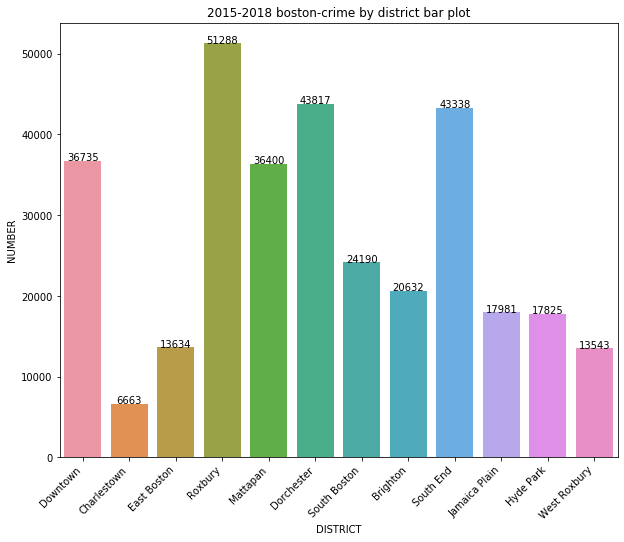

In [34]:
# show number of crime by region
plt.figure(figsize=(10,8))
plt.title(r'2015-2018 boston-crime by district bar plot')
p1=sns.barplot(x=number.index,y='NUMBER',data=number)
p1.set_xticklabels(p1.get_xticklabels(), rotation=45, horizontalalignment='right')# rotate x lable
x=np.arange(number.index.shape[0])
y=np.array(list(number['NUMBER']))
for i,j in zip(x,y):
    plt.text(i,j+0.05,'%d'%j,ha='center')
else:
    pass
p1fig=p1.get_figure()
p1fig.savefig('./total_by_district_bar.png')
plt.show()

<b>DISTRICT<b>
    - B2('Roxbury') district has highest number of crime
    - C11('Dorchester') and D4('South End') are higher than other district
    - A15('Charlestown') is least
    - follow this,from number dataframe take top5 district

### Top 5 District

In [35]:
districtsorted=number.sort_values(by='NUMBER',ascending=False)

In [36]:
top5=districtsorted.iloc[0:5,:]

In [37]:
top5

,NUMBER
DISTRICT,
Roxbury,51288
Dorchester,43817
South End,43338
Downtown,36735
Mattapan,36400


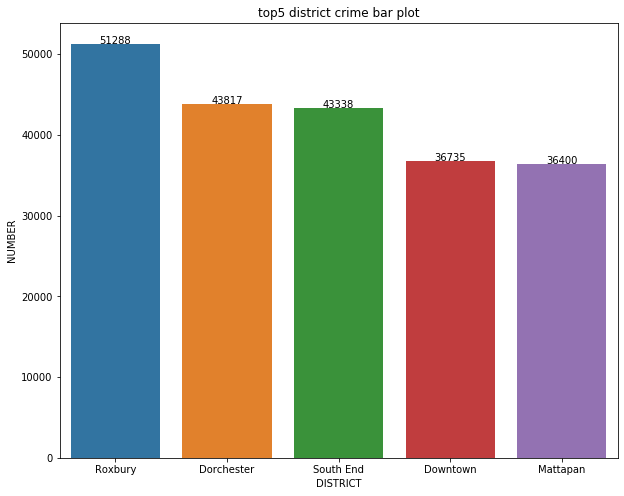

In [38]:
plt.figure(figsize=(10,8))
plt.title(r'top5 district crime bar plot')
p2=sns.barplot(x=top5.index,y='NUMBER',data=top5)
x=np.arange(top5.index.shape[0])
y=np.array(list(top5['NUMBER']))
for i,j in zip(x,y):
    plt.text(i,j+0.05,'%d'%j,ha='center')
else:
    pass
p2fig=p2.get_figure()
p2fig.savefig('./top5_district_crime_bar.png')
plt.show()

### Least 5 District

In [39]:
least5=districtsorted.iloc[7:12,:]

In [40]:
least5

,NUMBER
DISTRICT,
Jamaica Plain,17981
Hyde Park,17825
East Boston,13634
West Roxbury,13543
Charlestown,6663


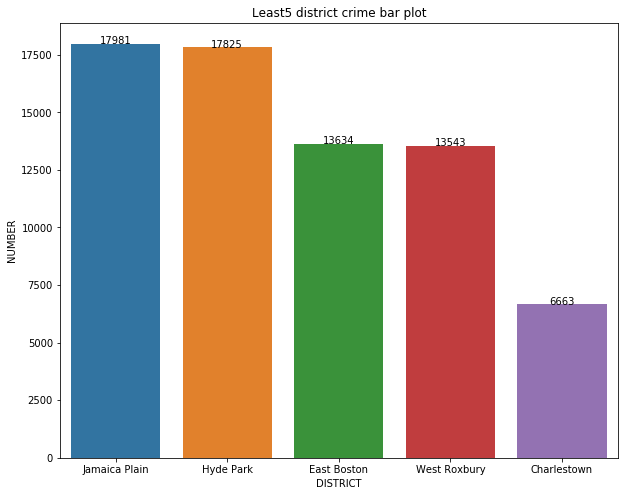

In [41]:
plt.figure(figsize=(10,8))
plt.title(r'Least5 district crime bar plot')
p3=sns.barplot(x=least5.index,y='NUMBER',data=least5)
x=np.arange(least5.index.shape[0])
y=np.array(list(least5['NUMBER']))
for i,j in zip(x,y):
    plt.text(i,j+0.05,'%d'%j,ha='center')
else:
    pass
p3fig=p3.get_figure()
p3fig.savefig('./least5_district_crime_bar.png')
plt.show()

### Larceny crime Heat map

- The crime relating to tourists the most is Larceny (theft), let's find where has the most theft crime

In [42]:
import folium
from folium.plugins import HeatMap

map_hooray = folium.Map(location=[42.361145,-71.057083],
                    zoom_start = 12, min_zoom=12) #Giving the location just write boston coordinat to google

heat_df = crime_df[crime_df['YEAR']==2017] # I take 2017 cause there is more crime against to other years
heat_df = heat_df[heat_df['OFFENSE_CODE_GROUP']=='Larceny'] 
heat_df = heat_df[['Lat', 'Long']] #giving only latitude and longitude now in heat_df just latitude and longitude
                                   #from 2017 larceny responde   
    
folium.CircleMarker([42.356145,-71.064083],
                    radius=50,
                    popup='Homicide',
                    color='red',
                    ).add_to(map_hooray) #Adding mark on the map but it's hard to find correct place. 
    
    
heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
#We have to give latitude and longitude like this [[lat, lon],[lat, lon],[lat, lon],[lat, lon],[lat, lon]]

HeatMap(heat_data, radius=10).add_to(map_hooray) #Adding map_hooray to HeatMap
map_hooray #Plotting

### Conclusion

### Price Analysis
- Average price by month
  - Feb cheapest
  - The price for Dec, Jan, Feb, March is lower than the other month.

- Averge price by week of day
  - Monday is the cheapest
  - Monday Tuesaday Wednesday Sunday is cheaper than the other days

- Average price by region
   - Most expensive Place is 5,000 each day
   - The most price is between 0-500
   - The region with the lowest average price is in Dorchester, Roxbury, Hyde Park, Roslindale, Mattapan
   - The average price for house is lower than the other type of property, most price for house is around 100 each day. But the range of price for house is large. 
   - For apartment, most price is around 200. The range for apartment is also very large. 
   - Surprisingly, the price for villa is cheaper than expected. between 100 to 200 each day.

### Crime Analysis
- Crime in Boston
    - Firday has more crime. Avoid go out on Friday.
    - During the day, around 12:00 lunch hour and between 4 and 6 in the afternoon. There are more crime than the other time of the day. 

- Crime by month
    - Dec, Jan, Feb, March has less crime than the other month.



- Crime count by region:
    - Top 5 crime region
        - Roxbury, Dorchester, South End, Downtown, Mattapan
    - Least 5 Crime region
        - Charlestown, Each Boston, Jamaica Plain, Hyde park and West Roxbury






### Sugggestions
- Dec, Jan, Feb, March has lower crime and lower price of living. Suggest tourist go Boston during these month
- Avoid go out on Friday and go downtown area between 4 and 6.
- Suggest travlers lives in Hyde park, because the price in this area is lower than the most region of Boston and the crime rate is lower than the most other regions. The only problem of living this place is that the location is far from the center of Boston and thus relatively inconvenient for tourist. 
- The second place suggest to choose to live is Charlestown. Although living in Charlestown region is the not very cheap and the price is between 100 to 200 each day, this area is safer and closer to center Boston and other scenery.
- For travelers with tight budget, they could choose house rather than the other type of properties.